In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
test_set.head()
train_set.head()
train = train_set.drop('SalePrice', axis = 1).copy()
data = pd.concat([train,test_set])

In [3]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

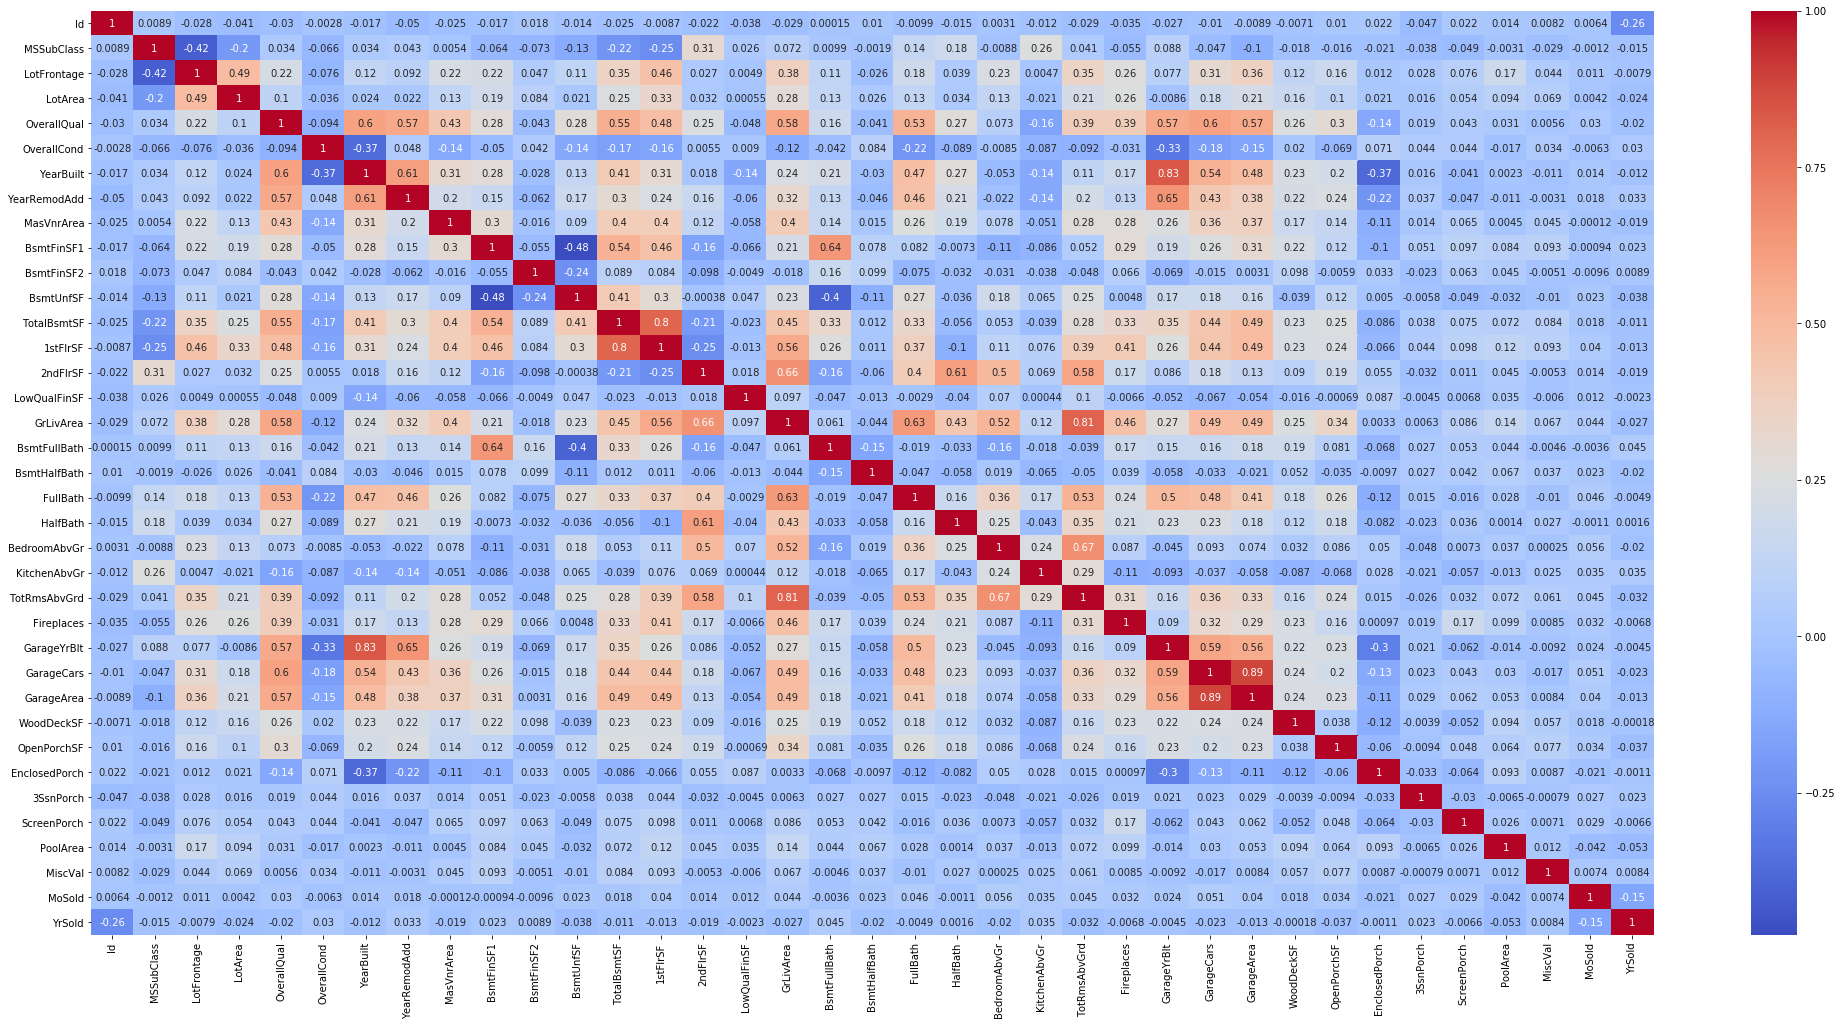

In [4]:
import seaborn as sns
plt.figure(figsize = (35,17))
sns.heatmap(data.corr(),cmap = 'coolwarm',annot = True)
plt.show()

# FEATURE ENGINEERING

In [5]:
total = (data.isnull().sum()).sort_values(ascending = False)

In [6]:
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)

In [7]:
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total','percent'])
missing_data

,Total,percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [8]:
#train_set.drop((missing_data[missing_data[total]>81]).index,1)
data = data.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [9]:
data.isnull().sum().sort_values(ascending = False)

MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
SaleType          1
Exterior2nd       1
Exterior1st       1
Electrical        1
KitchenQual       1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
Condition2        0
Neighborhood      0
MSSubClass        0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
RoofStyle         0
RoofMatl          0
Condition1        0
                 ..
HouseStyle        0
ExterQual         0
BldgType          0
SaleCondition     0
ExterCond         0
Foundation        0
YrSold            0
MoSold            0
MiscVal           0
PoolArea          0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0


In [10]:
# total_test = (test_set.isnull().sum()).sort_values(ascending = False)
# percent = (test_set.isnull().sum()/test_set.isnull().count()).sort_values(ascending = False)
# missing_test = pd.concat([total_test,percent],axis = 1,keys = ['totall','percentt'])
# missing_test

In [11]:

# test_set = test_set.drop((missing_test[missing_test['totall'] > 78]).index,1)
# #test_set = (test_set.drop(missing_test[missing_test['totall']>78]).index,0)

In [12]:
# test_set.isnull().sum().sort_values(ascending = False)

In [13]:
categorical_feature_mask = (data.dtypes == object)
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col :labelencoder.fit_transform(col.astype(str)))

In [15]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [16]:
# categorical_feature_mask = test_set.dtypes == object
# categorical_cols = test_set.columns[categorical_feature_mask].tolist()

In [17]:
#test_set[categorical_cols] = test_set[categorical_cols].apply(lambda col : labelencoder.fit_transform(col.astype(str)))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 64 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int32
LotArea          2919 non-null int64
Street           2919 non-null int32
LotShape         2919 non-null int32
LandContour      2919 non-null int32
Utilities        2919 non-null int32
LotConfig        2919 non-null int32
LandSlope        2919 non-null int32
Neighborhood     2919 non-null int32
Condition1       2919 non-null int32
Condition2       2919 non-null int32
BldgType         2919 non-null int32
HouseStyle       2919 non-null int32
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int32
RoofMatl         2919 non-null int32
Exterior1st      2919 non-null int32
Exterior2nd      2919 non-null int32
MasVnrType       2919 non-null int32
MasVn

In [19]:
data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())
data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mean())
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(data['BsmtFullBath'].mean())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
# data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())

In [20]:
# k = 15
# plt.figure(figsize = (16,18))
# corrmat = data.corr()
# cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
# print(cols)
# cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale = 1.25)
# hm = sns.heatmap(cm, annot = True)
# plt.show()

In [21]:
# train_set = train_set[cols]
# test_set = test_set[cols.drop('SalePrice')]
# test_set.isnull().sum().sort_values(ascending = False).head(20)
# test_set.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 64 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int32
LotArea          2919 non-null int64
Street           2919 non-null int32
LotShape         2919 non-null int32
LandContour      2919 non-null int32
Utilities        2919 non-null int32
LotConfig        2919 non-null int32
LandSlope        2919 non-null int32
Neighborhood     2919 non-null int32
Condition1       2919 non-null int32
Condition2       2919 non-null int32
BldgType         2919 non-null int32
HouseStyle       2919 non-null int32
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int32
RoofMatl         2919 non-null int32
Exterior1st      2919 non-null int32
Exterior2nd      2919 non-null int32
MasVnrType       2919 non-null int32
MasVn

In [22]:
# test_set['GarageYrBlt'] = test_set['GarageYrBlt'].fillna(test_set['GarageYrBlt'].mean())
# test_set['MasVnrArea'] = test_set['MasVnrArea'].fillna(test_set['MasVnrArea'].mean())
# test_set['BsmtFinSF1'] = test_set['BsmtFinSF1'].fillna(test_set['BsmtFinSF1'].mean())
# test_set['TotalBsmtSF'] = test_set['TotalBsmtSF'].fillna(test_set['TotalBsmtSF'].mean())
# test_set['GarageArea'] = test_set['GarageArea'].fillna(test_set['GarageArea'].mean())
# test_set['GarageCars'] = test_set['GarageCars'].fillna(test_set['GarageCars'].mean())
data.isnull().sum().sort_values(ascending = False)

SaleCondition    0
SaleType         0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
                ..
Functional       0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
HeatingQC        0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath

In [23]:
# ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
#        'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
#        'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
#        'BsmtFinSF1'],
#       dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 64 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int32
LotArea          2919 non-null int64
Street           2919 non-null int32
LotShape         2919 non-null int32
LandContour      2919 non-null int32
Utilities        2919 non-null int32
LotConfig        2919 non-null int32
LandSlope        2919 non-null int32
Neighborhood     2919 non-null int32
Condition1       2919 non-null int32
Condition2       2919 non-null int32
BldgType         2919 non-null int32
HouseStyle       2919 non-null int32
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int32
RoofMatl         2919 non-null int32
Exterior1st      2919 non-null int32
Exterior2nd      2919 non-null int32
MasVnrType       2919 non-null int32
MasVn

In [25]:
train_set1 = data.iloc[:1460, :]
test_set1 = data.iloc[1460:,:]

In [26]:
train_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int32
LotArea          1460 non-null int64
Street           1460 non-null int32
LotShape         1460 non-null int32
LandContour      1460 non-null int32
Utilities        1460 non-null int32
LotConfig        1460 non-null int32
LandSlope        1460 non-null int32
Neighborhood     1460 non-null int32
Condition1       1460 non-null int32
Condition2       1460 non-null int32
BldgType         1460 non-null int32
HouseStyle       1460 non-null int32
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int32
RoofMatl         1460 non-null int32
Exterior1st      1460 non-null int32
Exterior2nd      1460 non-null int32
MasVnrType       1460 non-null int32
MasVn

In [27]:
test_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 64 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int32
LotArea          1459 non-null int64
Street           1459 non-null int32
LotShape         1459 non-null int32
LandContour      1459 non-null int32
Utilities        1459 non-null int32
LotConfig        1459 non-null int32
LandSlope        1459 non-null int32
Neighborhood     1459 non-null int32
Condition1       1459 non-null int32
Condition2       1459 non-null int32
BldgType         1459 non-null int32
HouseStyle       1459 non-null int32
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int32
RoofMatl         1459 non-null int32
Exterior1st      1459 non-null int32
Exterior2nd      1459 non-null int32
MasVnrType       1459 non-null int32
MasVn

In [28]:
from sklearn.model_selection import train_test_split
test_set123 = pd.DataFrame(train_set['SalePrice'])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(train_set1, test_set123['SalePrice'], test_size = 0.3, random_state = 42)

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 64 columns):
Id               1022 non-null int64
MSSubClass       1022 non-null int64
MSZoning         1022 non-null int32
LotArea          1022 non-null int64
Street           1022 non-null int32
LotShape         1022 non-null int32
LandContour      1022 non-null int32
Utilities        1022 non-null int32
LotConfig        1022 non-null int32
LandSlope        1022 non-null int32
Neighborhood     1022 non-null int32
Condition1       1022 non-null int32
Condition2       1022 non-null int32
BldgType         1022 non-null int32
HouseStyle       1022 non-null int32
OverallQual      1022 non-null int64
OverallCond      1022 non-null int64
YearBuilt        1022 non-null int64
YearRemodAdd     1022 non-null int64
RoofStyle        1022 non-null int32
RoofMatl         1022 non-null int32
Exterior1st      1022 non-null int32
Exterior2nd      1022 non-null int32
MasVnrType       1022 non-null int32
Mas

In [31]:
y_train = pd.DataFrame(y_train)

In [32]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 1 columns):
SalePrice    1022 non-null int64
dtypes: int64(1)
memory usage: 16.0 KB


In [33]:
y_test = pd.DataFrame(y_test)

In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 892 to 798
Data columns (total 64 columns):
Id               438 non-null int64
MSSubClass       438 non-null int64
MSZoning         438 non-null int32
LotArea          438 non-null int64
Street           438 non-null int32
LotShape         438 non-null int32
LandContour      438 non-null int32
Utilities        438 non-null int32
LotConfig        438 non-null int32
LandSlope        438 non-null int32
Neighborhood     438 non-null int32
Condition1       438 non-null int32
Condition2       438 non-null int32
BldgType         438 non-null int32
HouseStyle       438 non-null int32
OverallQual      438 non-null int64
OverallCond      438 non-null int64
YearBuilt        438 non-null int64
YearRemodAdd     438 non-null int64
RoofStyle        438 non-null int32
RoofMatl         438 non-null int32
Exterior1st      438 non-null int32
Exterior2nd      438 non-null int32
MasVnrType       438 non-null int32
MasVnrArea       438 non-null

In [35]:
from sklearn.ensemble import RandomForestRegressor


In [36]:
x_test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,893,20,3,8414,1,3,3,0,4,0,...,0,0,0,0,0,0,2,2006,8,4
1105,1106,60,3,12256,1,0,3,0,0,0,...,32,0,0,0,0,0,4,2010,8,4
413,414,30,4,8960,1,3,3,0,4,0,...,0,130,0,0,0,0,3,2010,8,4
522,523,50,4,5000,1,3,3,0,0,0,...,24,36,0,0,0,0,10,2006,8,4
1036,1037,20,3,12898,1,0,1,0,4,0,...,0,0,0,0,0,0,9,2009,8,4


In [37]:
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(train_set1, test_set123)

C:\Users\u\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
pred = rf.predict(test_set1)

In [39]:
score_train = rf.score(x_train, y_train)
score_train

0.9773950227529058

In [40]:
sub = pd.read_csv('sample_submission.csv')

In [41]:
pred = pd.DataFrame(pred)

In [42]:
datasets = pd.concat([sub['Id'], pred], axis = 1)

In [43]:
datasets.columns = ['Id','SalePrice']

In [44]:
datasets.to_csv(path_or_buf = 'submission_.csv', index = False)

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
score = mean_squared_error(sub['SalePrice'], pred)
score

4900733603.71018

In [47]:
import math

In [48]:
score = math.sqrt(score)
score

70005.23983038827

In [49]:
from xgboost import XGBRegressor

In [50]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
    }

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
model = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(x_train, y_train)
# {'n_estimators': 1100,
#  'min_child_weight': 4,
#  'max_depth': 2,
#  'learning_rate': 0.2,
#  'booster': 'gbtree',
#  'base_score': 0.25}


[08:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [53]:
rf_random = RandomizedSearchCV(estimator = model,param_distributions = hyperparameter_grid,cv = 4) 

In [54]:
prediction = model.predict(test_set1)

In [55]:
rf_random.fit(x_train, y_train)

[08:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Users\u\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[08:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.25, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.2, max_delta_step=0,
                                          max_depth=2, min_child_weight=4,
                                          missing=None, n_estimators=1100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_...
                                          verbosity=1),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
  

In [56]:
rf_random.best_score_

0.8564440423105376

In [57]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.5}

In [58]:
pred_df = pd.DataFrame(prediction)

In [59]:
score = mean_squared_error(sub['SalePrice'], pred_df)
score

5636555832.26166

In [60]:
score = math.sqrt(score)
score

75076.99935573917